<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_09_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순차 데이터와 순환 신경망
---


## 핵심 키워드
---
- 순차 데이터
- 순환 신경망
- 셀
- 은닉 상태

## 순차 데이터 sequentail data
---

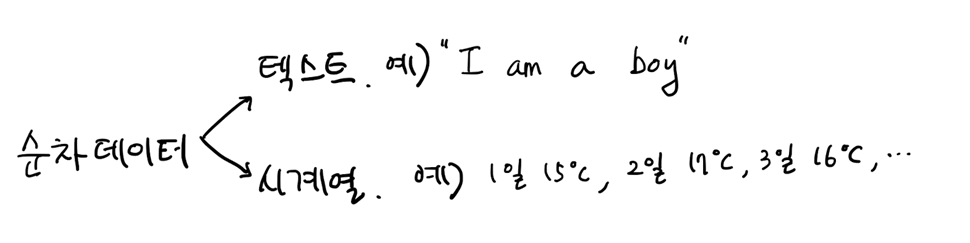

- 텍스트나 시계열 데이터 time series data와 같은 순서에 의미가 있는 데이터
- 'boy am a I'라든가 일별 온도데이터의 날짜가 뒤죽 박죽이면 내일의 날씨 예측이 쉽지 않게 됨
- 댓글에 '별로지만 추천해요'은 긍정적인가 부정적인가?
- 이런 데이터는 순서를 유지하며 신경망에 주입해야 함

### 피드포워드 신경망 feedforward neural network
---
- 흐름이 앞으로만 전달되는 신경망
- 완전 연결 신경망이나 합성곱 신경망
- 하나의 샘플(또는 하나의 배치)을 사용하여 정방향으로만 계산

## 순환 신경망 recurrent neural network RNN
---
- 이전 샘플에 대한 기억을 가지고 있는 신경망
- 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나 추가

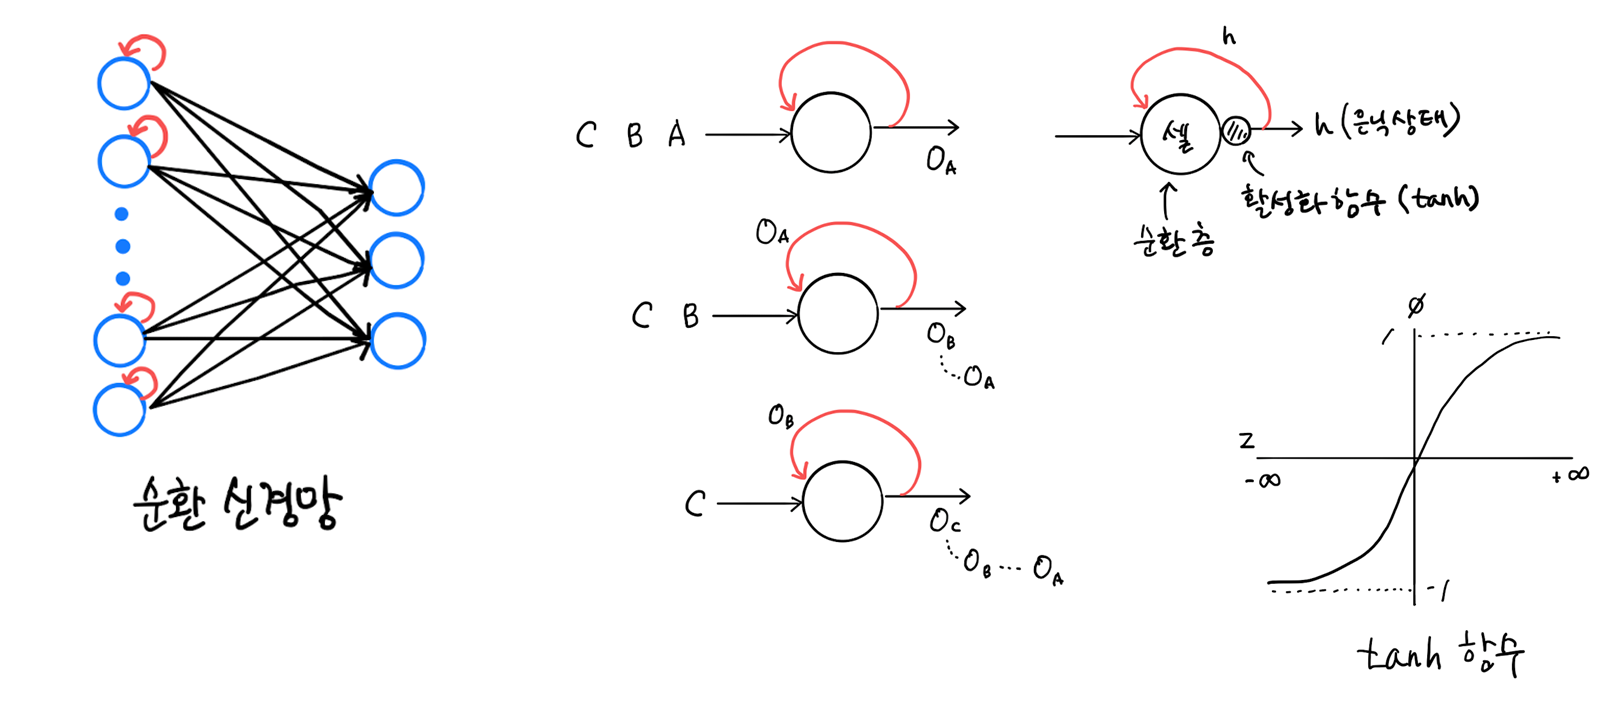

### 타임스텝 timestep
---
- 샘플이 처리되는 한 단계
- 뉴런의 출력이 다시 자기 자신으로 전달
- A,B,C 3개의 샘플을 처리하는 순환 신경망의 경우 첫 번째 A를 처리하고 그 출력 $O_A$는 다시 뉴런으로 입력
- 다음 출력 A의 정보가 들어있는 $O_A$는 B와 함께 사용되고 그 출력 $O_B$는 다시 뉴런으로 입력
- 다음 출력 B+A의 정보가 들어있는 $O_B$는 C와 함께 사용

> **순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래될수록 순환되는 정보는 희미해짐**


### 셀 cell
---
- 순환 신경망에서의 층을 특별히 셀이라고 함
- 한 셀에는 여러개의 뉴런이 있지만 모두 표시하지 않고 하나의 셀층으로 표현
- 셀의 출력을 은닉 상태 hidden state 라고 함

### 하이퍼볼릭 탄젠트 hyperbolic tangent tanh
---
- 순환 신경망도 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음층으로 전달
- 다른 점은 층의 출력(은닉 상태)을 다음 타임스텝에서 재사용 하는 것뿐
- 일반적으로 은닉층의 활성화 함수는 텐에이치 함수 사용
- 텐에이치함수는 시그모이드 0 ~ 1 범위와 달리  -1 ~ 1의 범위를 가짐


### 타임스텝으로 펼친 신경망
---

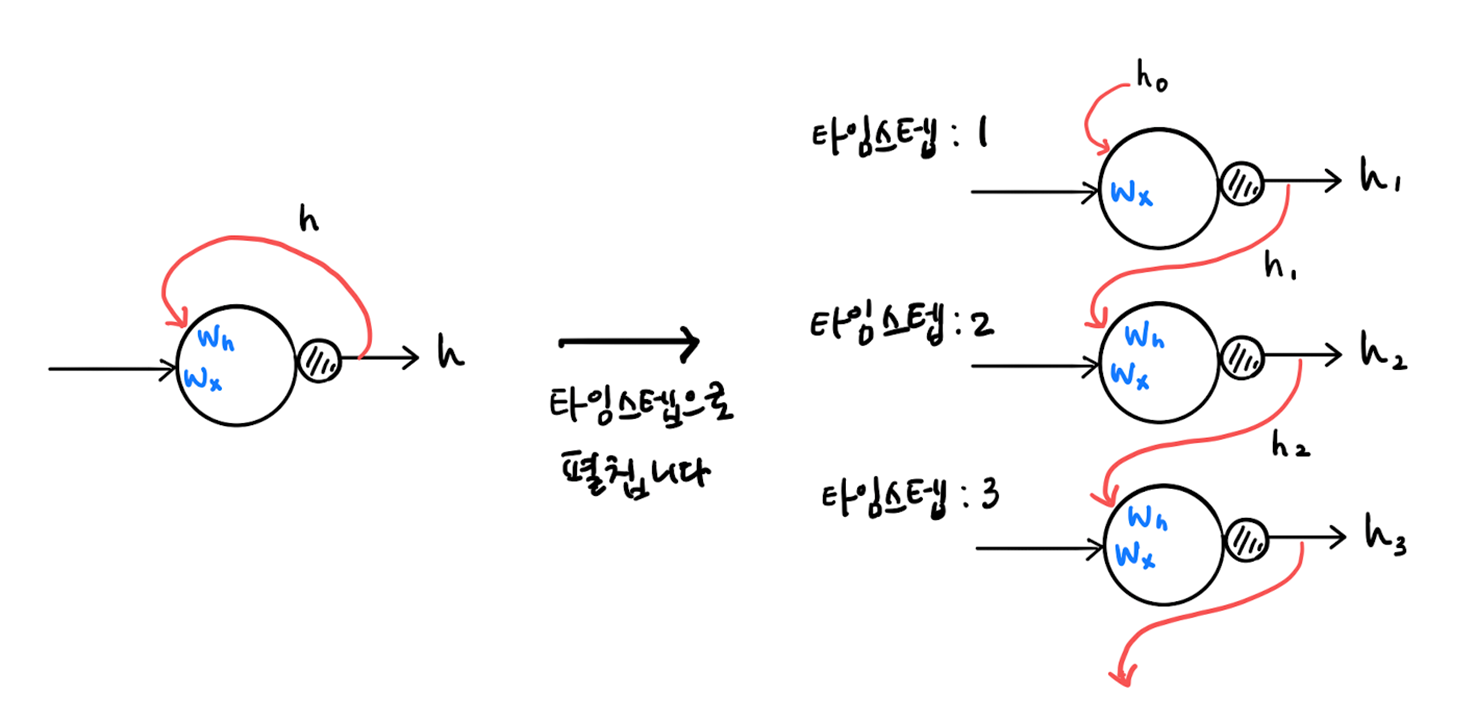

- 순환 신경망의 뉴런 셀은 이전 타임스텝의 은닉 상태에 곱해지는 가중치와 입력 가중치를 가짐
- 최초 타임스텝1에는 이전 타임스텝이 없으로 0으로 초기화된 $h_0$를 전달 그 후는 각 타임스텝의 출력 $h_n$을 전달 $W_h$는 타임스텝에 따라 변화되는 뉴런의 출력을 학습
- $Z = X*W_x + H*W_h + b$
- $H = tanh(Z)$

### 순환 신경망의 가중치
---


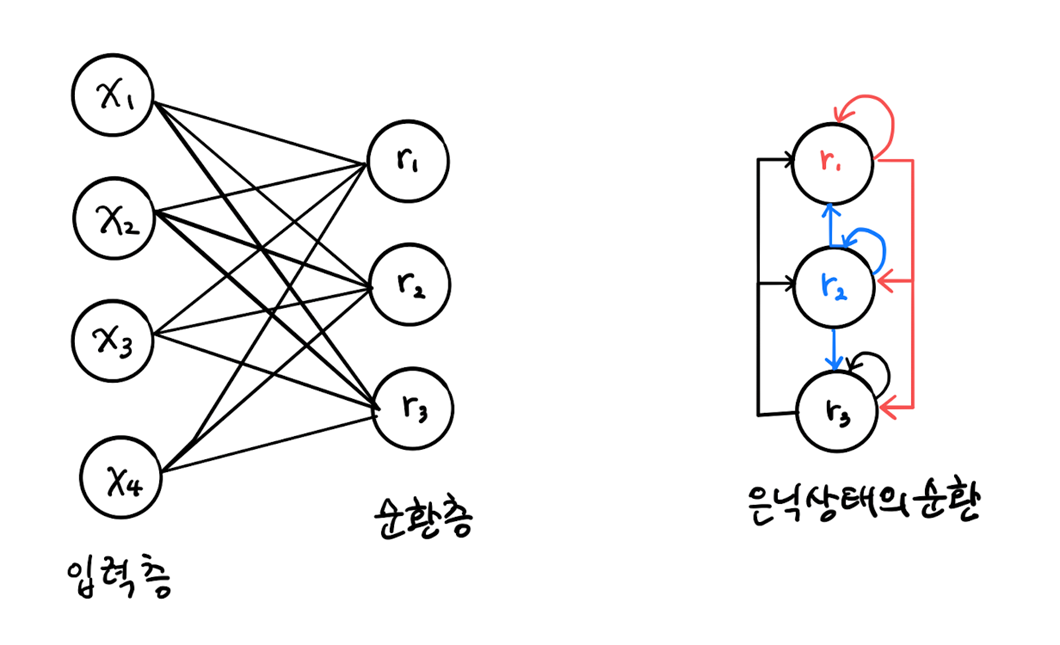

- 입력층 4개특성, 순환층의 뉴런 3개 => 가중치 크기는 $W_x$ 12개
- $W_h$의 갯수는 순환층 $r_1$의 은닉상태가 다음 타암스텝에 재사용될 때 $r_1$ 자신 뿐만 아니라 $r_2$,  $r_3$ 뉴런에도 모두 전달, 두 번째, 세 번째 뉴런의 은닉 상태도 동일 => 3 x 3 = 9 개
- 순환층의 가중치 크기, 모델 파라미터 = 12 + 9 + 3(절편) = 24


### 순환 신경망의 입력
---
- 합성곱 층의 입력은 하나의 샘플이 3차원으로 합성곱 층과 플링 층을 통과해도 차원의 개수는 유지
- 순환층은 일반적으로 샘플마다 시퀜스 sequence와 단어표현 이라는 2개의 차원을 가짐


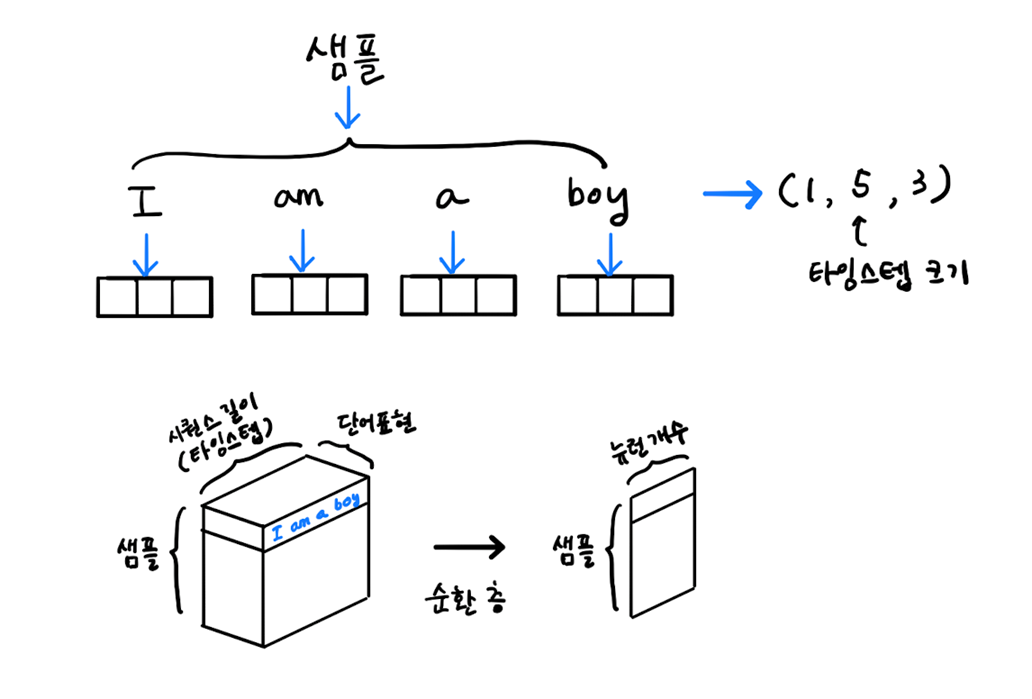

- 샘플에 'I am a boy'라는 문장이 들어 있고, 각 단어를 3개의 어떤 숫자로 표현한다고 가정 하면 => 타임스텝 크기는 (1,4,3)
- 이 입력이 순환층을 통과하고 나면 1차원의 뉴런 개수만큼 출력
- 즉 시퀜스길이와 단어표현으로 이루어진 2차원 하나의 샘플은 순환층을 통과하면 순환층 뉴런 개수의 1차원의 배열로 변환
- 순환층 셀은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보냄 

### 다층 순환 신경망
---


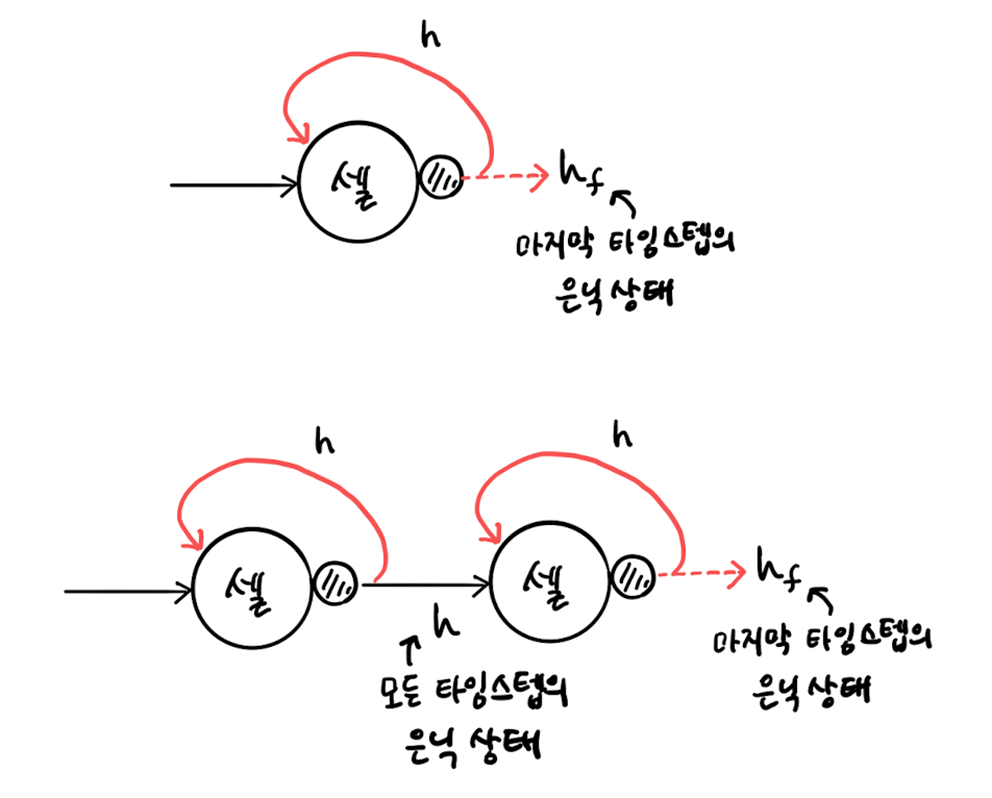

- RNN도 여러개의 층 쌓기 가능
- 여러 층인 경우는 마지막 셀의 은닉상태를 제외하고는 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원읜 모든 은닉상태를 전달 해야 함

### 순환 신경망을 사용한 예측
---

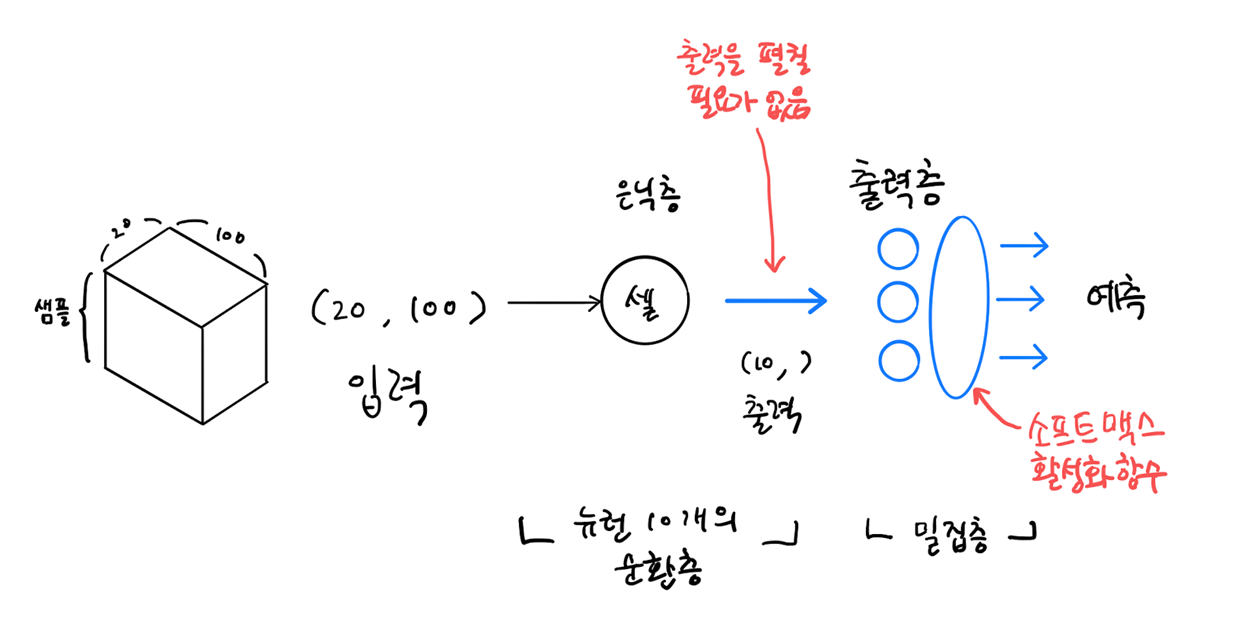

- 출력층의 구성은 다른 신경망과 같이 밀집층을 두어 클래스 분류
- 다중 분류의 경우 클래스 개수만큼의 뉴런과 소프트맥스 활성화 함수 사용
- 이진 분류인 경우 하나의 뉴런과 시그모이드 활성화 함수 사용
- 마지막 셀의 출력은 1차원 은닉 상태의 출력이므로 그냥 사용하면 됨